## RFM Analysis

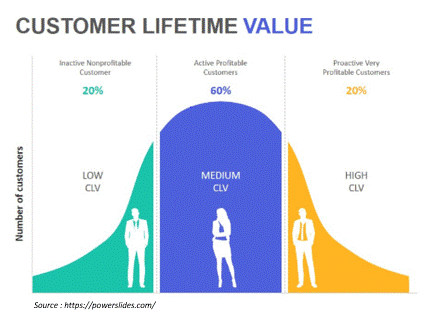|

<ul>
    <li>Recency (R): How recently a customer has made a purchase</li>
    <li>Frequency (F): How often a customer makes a purchase</li>
    <li>Monetary Value (M): Dollar value of the purchases</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import math
from datetime import datetime

In [2]:
df=pd.read_csv('combined.csv')
df.head()

,Unnamed: 0,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,1,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02
2,2,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
3,3,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10
4,4,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87


In [3]:
df.shape

(19329, 32)

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02
2,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
3,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10
4,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19324,3500,9491 Green Ridge Terrace,2100,NSW,Australia,10,Josy,Fleeman,Female,71,...,True,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,198.22
19325,3500,9491 Green Ridge Terrace,2100,NSW,Australia,10,Josy,Fleeman,Female,71,...,False,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,827.16
19326,3500,9491 Green Ridge Terrace,2100,NSW,Australia,10,Josy,Fleeman,Female,71,...,False,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,144.26
19327,3500,9491 Green Ridge Terrace,2100,NSW,Australia,10,Josy,Fleeman,Female,71,...,False,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,15.08


In [5]:
df['transaction_date'].min(),df['transaction_date'].max()

('2017-01-01 00:00:00', '2017-12-30 00:00:00')

In [6]:
from datetime import datetime
now = datetime.now()
df["DOB"]=pd.to_datetime(df["DOB"])
df["transaction_date"]=pd.to_datetime(df["transaction_date"])


In [7]:
rfm= df.groupby('customer_id').agg({'transaction_date': lambda date: (now - date.max()).days,
                                        'transaction_id': lambda num: len(num),
                                        'list_price': lambda price: price.sum()})


In [8]:
rfm.columns=['monetary','frequency','recency']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,monetary,frequency,recency
customer_id,,,
1,1343,11,9084
2,1464,3,4149
4,1531,2,1047
5,1352,6,5903
6,1400,5,5931


In [9]:
# Ranking each metric R , F & M
rfm_df=rfm.copy()
rfm_df['R_rank'] = rfm_df['recency'].rank( ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)
rfm_df.head()

,monetary,frequency,recency,R_rank,F_rank,M_rank
customer_id,,,,,,
1,1343,11,9084,565.5,3339.0,358.5
2,1464,3,4149,2561.5,433.5,2963.5
4,1531,2,1047,3355.0,152.0,3277.5
5,1352,6,5903,1733.5,1982.5,774.5
6,1400,5,5931,1719.0,1408.5,2170.0


In [10]:
# normalize each rank with Max rank
rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['F_rank']/rfm_df['M_rank'].max())*100
rfm_df.head()


,monetary,frequency,recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
customer_id,,,,,,,,,
1,1343,11,9084,565.5,3339.0,358.5,16.583578,97.946612,97.917889
2,1464,3,4149,2561.5,433.5,2963.5,75.117302,12.716339,12.712610
4,1531,2,1047,3355.0,152.0,3277.5,98.387097,4.458786,4.457478
5,1352,6,5903,1733.5,1982.5,774.5,50.835777,58.154884,58.137830
6,1400,5,5931,1719.0,1408.5,2170.0,50.410557,41.317102,41.304985


In [11]:

#Giving equal weightage to all the Parameters in our case.
weight=1/3
rfm_df['RFM_Score']=weight*rfm_df['R_rank_norm']+weight*rfm_df['F_rank_norm']+weight*rfm_df['M_rank_norm']
rfm_df=rfm_df.round(0)
rfm_df.head()

,monetary,frequency,recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
customer_id,,,,,,,,,,
1,1343,11,9084,566.0,3339.0,358.0,17.0,98.0,98.0,71.0
2,1464,3,4149,2562.0,434.0,2964.0,75.0,13.0,13.0,34.0
4,1531,2,1047,3355.0,152.0,3278.0,98.0,4.0,4.0,36.0
5,1352,6,5903,1734.0,1982.0,774.0,51.0,58.0,58.0,56.0
6,1400,5,5931,1719.0,1408.0,2170.0,50.0,41.0,41.0,44.0


In [12]:
rfm_df.sort_values('RFM_Score',ascending=False,inplace=True)
rfm_df

,monetary,frequency,recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
customer_id,,,,,,,,,,
789,1340,8,4497,2399.0,2868.0,222.0,70.0,84.0,84.0,80.0
1600,1349,9,5904,1732.0,3114.0,642.0,51.0,91.0,91.0,78.0
944,1421,8,4915,2199.0,2868.0,2545.0,64.0,84.0,84.0,78.0
2479,1338,7,3335,2889.0,2490.0,122.0,85.0,73.0,73.0,77.0
2732,1352,10,6703,1361.0,3262.0,774.0,40.0,96.0,96.0,77.0
...,...,...,...,...,...,...,...,...,...,...
569,1434,4,7560,1049.0,862.0,2712.0,31.0,25.0,25.0,27.0
2321,1497,3,5473,1934.0,434.0,3160.0,57.0,13.0,13.0,27.0
2091,1547,3,5499,1920.0,434.0,3318.0,56.0,13.0,13.0,27.0


In [13]:
rfm_df=rfm_df[:1000]

In [14]:
rfm_df.reset_index(inplace=True)

In [15]:
rfm_df

,customer_id,monetary,frequency,recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,789,1340,8,4497,2399.0,2868.0,222.0,70.0,84.0,84.0,80.0
1,1600,1349,9,5904,1732.0,3114.0,642.0,51.0,91.0,91.0,78.0
2,944,1421,8,4915,2199.0,2868.0,2545.0,64.0,84.0,84.0,78.0
3,2479,1338,7,3335,2889.0,2490.0,122.0,85.0,73.0,73.0,77.0
4,2732,1352,10,6703,1361.0,3262.0,774.0,40.0,96.0,96.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1514,1403,7,7863,940.0,2490.0,2228.0,28.0,73.0,73.0,58.0
996,32,1474,7,7873,933.0,2490.0,3040.0,27.0,73.0,73.0,58.0
997,2120,1338,8,11028,222.0,2868.0,122.0,7.0,84.0,84.0,58.0
998,1421,1393,6,5452,1949.0,1982.0,2014.0,57.0,58.0,58.0,58.0


In [16]:
df_new=df[['customer_id','first_name', 'last_name', 'gender','job_industry_category','address', 'postcode', 'state', 'country']]
df_new=df_new.drop_duplicates(subset=['customer_id'], keep='first')
rfm_full=pd.merge(rfm_df[['customer_id','RFM_Score']],df_new,on="customer_id",how="left")

In [17]:
rfm_full

,customer_id,RFM_Score,first_name,last_name,gender,job_industry_category,address,postcode,state,country
0,789,80.0,Gabrielle,Giraudot,Female,Manufacturing,37817 Burning Wood Circle,2126,NSW,Australia
1,1600,78.0,Priscella,Stathers,Female,Financial Services,96 Sundown Point,4220,QLD,Australia
2,944,78.0,Anderea,Dallewater,Female,Manufacturing,9 Colorado Trail,3799,VIC,Australia
3,2479,77.0,Helge,Voller,Female,Retail,88540 Scoville Plaza,3195,VIC,Australia
4,2732,77.0,Clarine,Yushkin,Female,Health,5705 Spaight Place,3067,VIC,Australia
...,...,...,...,...,...,...,...,...,...,...
995,1514,58.0,Pren,Brangan,Male,Financial Services,29 Spohn Drive,2212,NSW,Australia
996,32,58.0,Marion,Vanichkin,Female,Manufacturing,2951 Petterle Place,2756,NSW,Australia
997,2120,58.0,Clare,Attoe,Male,Manufacturing,35 Harbort Way,2446,NSW,Australia
998,1421,58.0,Mallorie,Gouth,Female,Property,2 Alpine Circle,2765,NSW,Australia


In [18]:
rfm_full.to_csv("rfm.csv")

<ul>
    <li>High Value Customer: They are the loyal customers. So constant support should be provided to them via good customer service</li>
    <li>Medium Value Customer: Sending them personalized emails with offers and encouraging them to shop more</li>
    <li>Low Value Customer: These customers are about to churn or went into a dormant stage, so reactivation strategies should be applied for them</li>
</ul>